<a href="https://colab.research.google.com/github/Fyodor-DOs/PCVK_02_Ahmed-Fathir-Syafaat/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 9 – Morfologi
## NAMA  : AHMED FATHIR SYAFAAT
## KELAS : TI - 3H

## TUGAS PRAKTIKUM

In [ ]:
# Akses google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import library
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

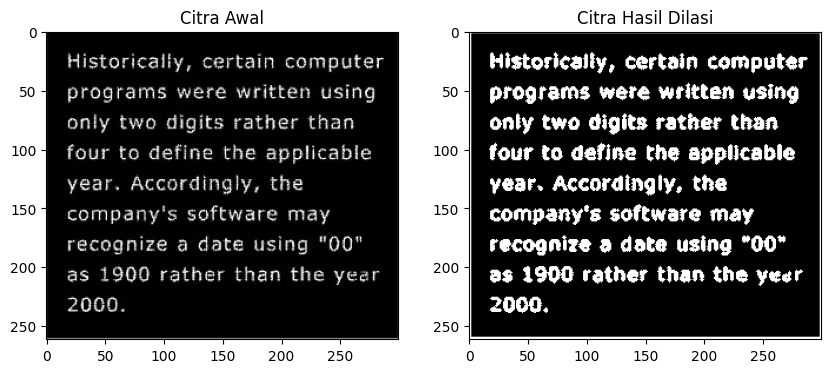

In [ ]:
# (3) Fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology

img_morph = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')

def dilate_manual(image, kernel):
    dilated_image = np.zeros_like(image)
    pad = kernel.shape[0] // 2
    padded_image = np.pad(image, pad, mode='constant')

    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            region = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            if np.any(region[kernel == 1]):
                dilated_image[i - pad, j - pad] = 255
    return dilated_image

# Structuring element berbentuk cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)


_, img_binary = cv2.threshold(img_morph, 128, 255, cv2.THRESH_BINARY)

dilated_image = dilate_manual(img_binary, kernel)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img_morph, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()


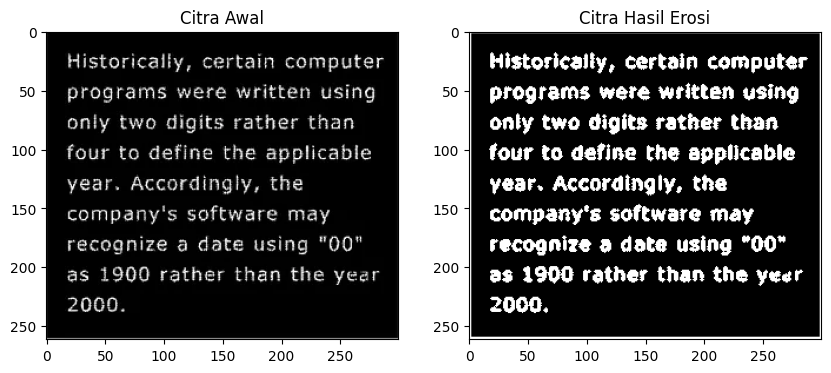

In [ ]:
# (4) Program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)


_, img_binary = cv2.threshold(img_morph, 128, 255, cv2.THRESH_BINARY)

dilated_image = cv2.dilate(img_binary, kernel)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img_morph, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()


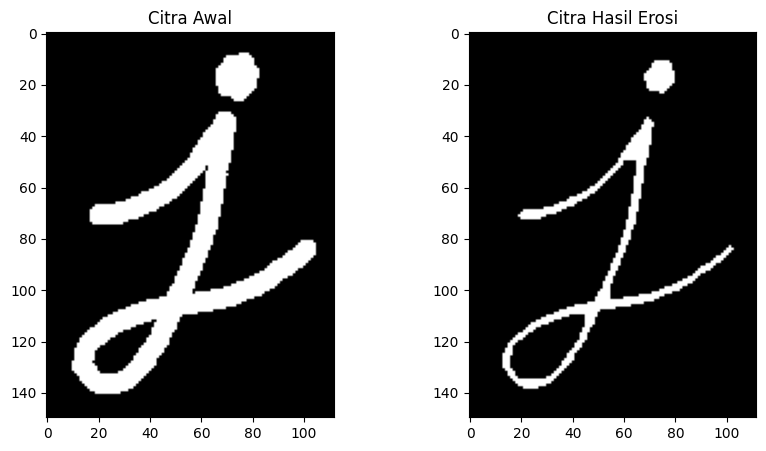

In [ ]:
# (5) Fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology

img_j = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)

def erode_manual(image, kernel):
   # Ambil ukuran citra dan elemen penstrukturan
    img_h, img_w = image.shape
    se_h, se_w = kernel.shape

    # Tentukan padding
    pad_h = se_h // 2
    pad_w = se_w // 2

    # Buat citra output dan citra padded
    eroded_image = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Operasi erosi
    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            # Sub-citra sesuai ukuran SE
            sub_image = padded_image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            # Jika semua piksel sub-citra sesuai dengan elemen penstrukturan (semua 1), maka erosi di (i,j) adalah 1
            if np.all(sub_image == kernel):
                eroded_image[i-pad_h, j-pad_w] = 1

    return eroded_image

# Structuring element berbentuk square 5x5
kernel = np.ones((5, 5), dtype=np.uint8)

binary_img_j = (img_j > 127).astype(np.uint8)
eroded_image = erode_manual(binary_img_j, kernel)


plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()


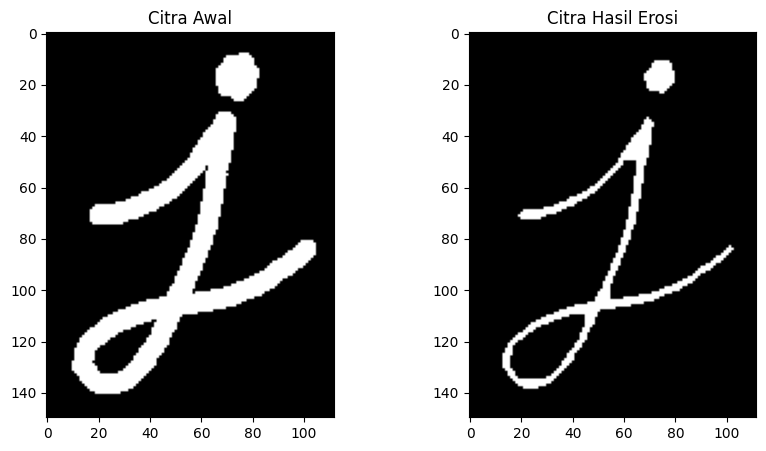

In [ ]:
# (6) Program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology

_, img_binary = cv2.threshold(img_j, 128, 255, cv2.THRESH_BINARY)

eroded_image = cv2.erode(img_binary, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

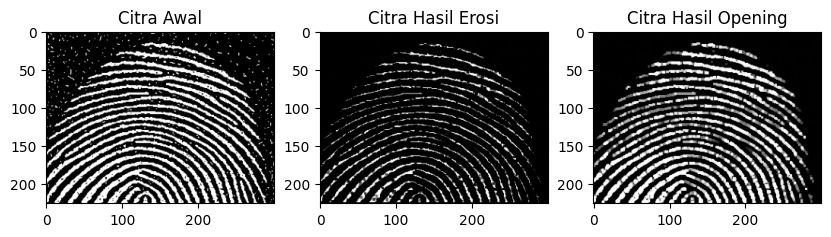

In [ ]:
# (7) Program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology

img_finger = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', 0)

def erosi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_erosi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_erosi[i,j] = np.min(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]])

  return img_erosi

def dilasi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_dilasi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_dilasi[i,j] = np.max(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]]+mask)
  return img_dilasi


kernel = np.ones((3,3),np.uint8)
img_opening = erosi_manual(img_finger,kernel,1)
res_opening = dilasi_manual(img_opening,kernel,1)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img_finger, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(img_opening, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(res_opening, cmap='gray'), plt.title('Citra Hasil Opening')
plt.show()


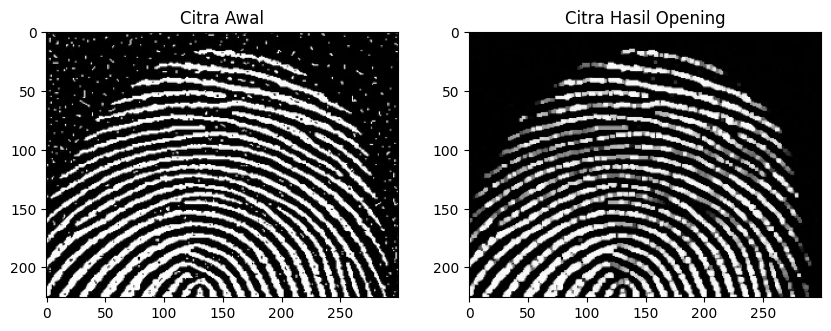

In [ ]:
# Menggunakan library morphology

opening = cv2.morphologyEx(img_finger, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_finger, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Opening')
plt.show()

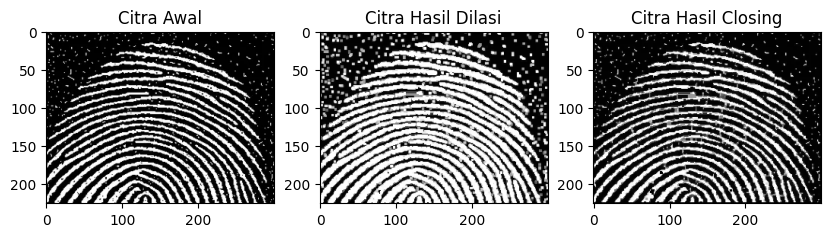

In [ ]:
# (8) Program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology

def erosi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_erosi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_erosi[i,j] = np.min(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]])

  return img_erosi

def dilasi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_dilasi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_dilasi[i,j] = np.max(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]]+mask)
  return img_dilasi


kernel = np.ones((3,3),np.uint8)
img_closing = dilasi_manual(img_finger,kernel,1)
res_closing = erosi_manual(img_closing,kernel,1)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img_finger, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(img_closing, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(res_closing, cmap='gray'), plt.title('Citra Hasil Closing')
plt.show()

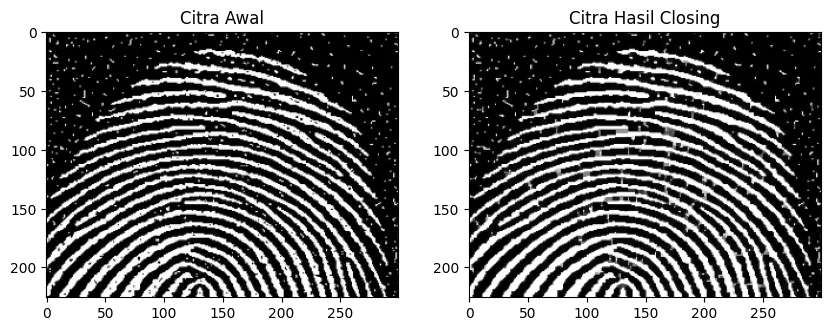

In [ ]:
# Menggunakan library morphology

opening = cv2.morphologyEx(img_finger, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_finger, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Closing')
plt.show()

SED = Cross 3


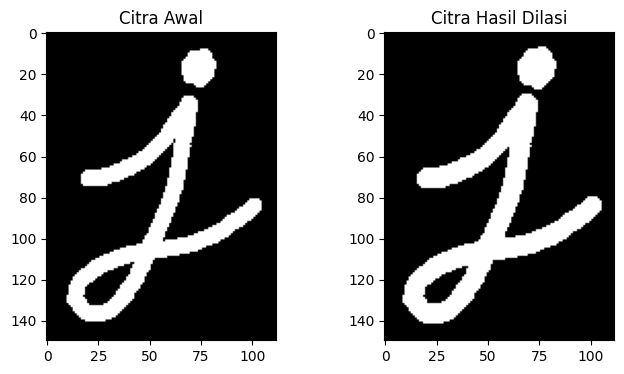

SED = Cross 5


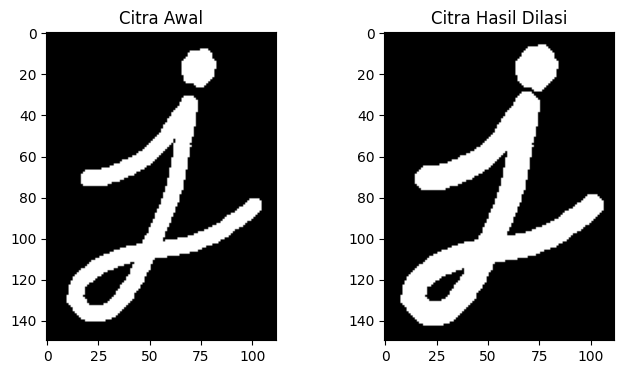

In [ ]:
# (9) Program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

kernel1_cross = np.array([[0,1,0],
                          [1,0,1],
                          [0,1,0]], dtype=np.uint8)

kernel2_cross = np.array([[0,0,1,0,0],
                          [0,0,1,0,0],
                          [1,1,1,1,1],
                          [0,0,1,0,0],
                          [0,0,1,0,0]], dtype=np.uint8)

dilated_img1 = cv2.dilate(img_j, kernel1_cross)
dilated_img_j = cv2.dilate(img_j, kernel2_cross)

plt.figure(figsize=(8, 4))
print('SED = Cross 3')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_img1, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Cross 5')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_img_j, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

SED = Circular 3


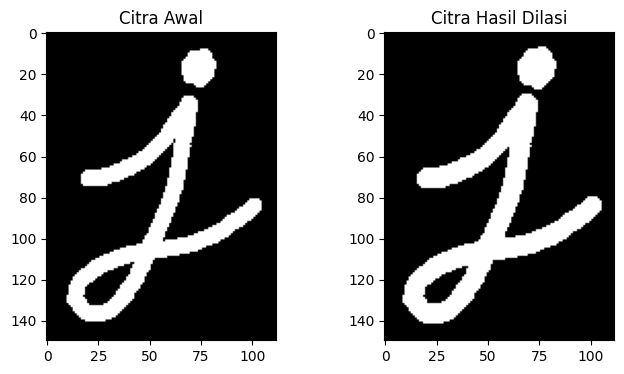

SED = Circular 5


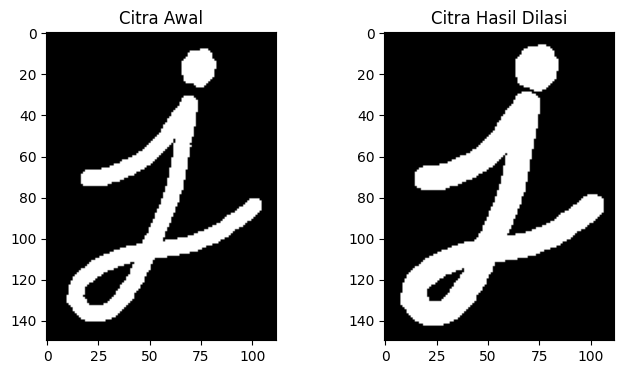

In [ ]:
# (10) Program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

# Structuring Element Ellipse 3x3
kernel1_circluar = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Structuring Element Ellipse 5x5
kernel2_circluar = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

dilated_img1 = cv2.dilate(img_j, kernel1_circluar)
dilated_img_j = cv2.dilate(img_j, kernel2_circluar)

plt.figure(figsize=(8, 4))
print('SED = Circular 3')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_img1, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Circular 5')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_img_j, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

SED = Rectangle 3


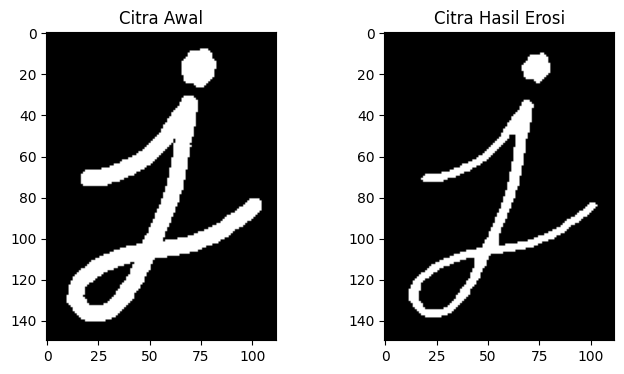

SED = Rectangle 5


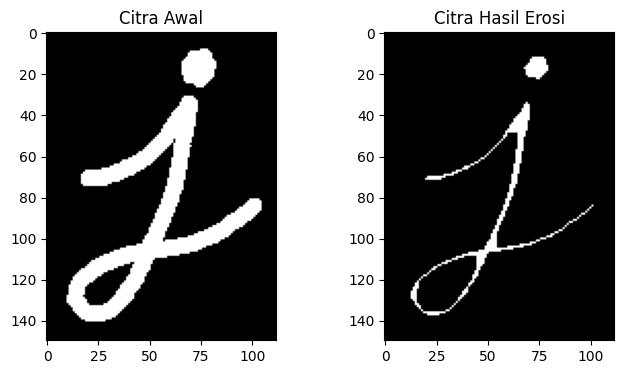

In [ ]:
# (11) Program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

# Structuring Element Rectangle 3x3
kernel1_Rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))

# Structuring Element Rectangle 5x5
kernel2_Rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

deroded_img1 = cv2.erode(img_j, kernel1_Rectangle)
deroded_img_j = cv2.erode(img_j, kernel2_Rectangle)

plt.figure(figsize=(8, 4))
print('SED = Rectangle 3')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(deroded_img1, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Rectangle 5')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(deroded_img_j, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

SED = Line Vertical 3


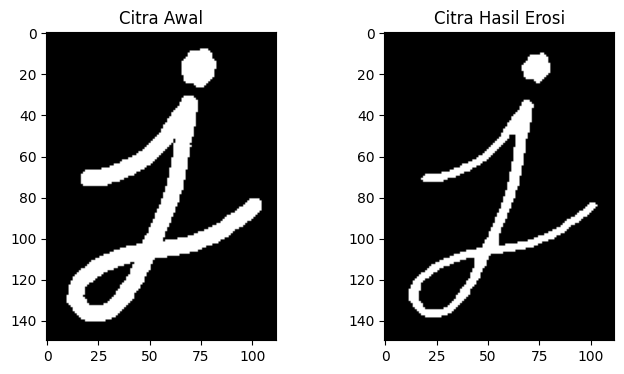

SED = Line Vertical 5


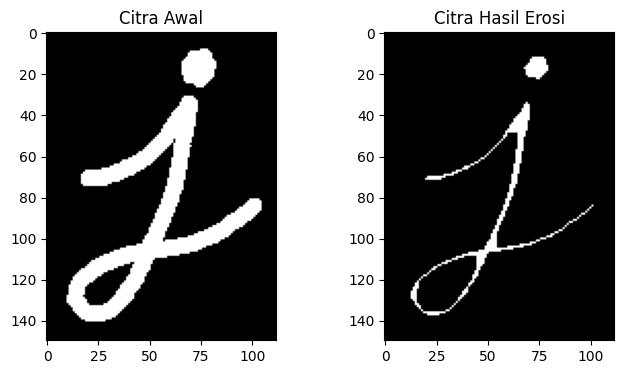

In [ ]:
# (12) Program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

kernel1_vertical = np.array([[0,1,0],
                             [0,1,0],
                             [0,1,0]], dtype=np.uint8)

kernel2_vertical = np.array([[0,0,1,0,0],
                             [0,0,1,0,0],
                             [0,0,1,0,0],
                             [0,0,1,0,0],
                             [0,0,1,0,0]], dtype=np.uint8)

deroded_img_1 = cv2.erode(img_j, kernel1_vertical)
deroded_img_2 = cv2.erode(img_j, kernel2_vertical)

plt.figure(figsize=(8, 4))
print('SED = Line Vertikal 3')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(deroded_img1, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Line Vertikal 5')
plt.subplot(121), plt.imshow(img_j, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(deroded_img_j, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

## TUGAS KELOMPOK

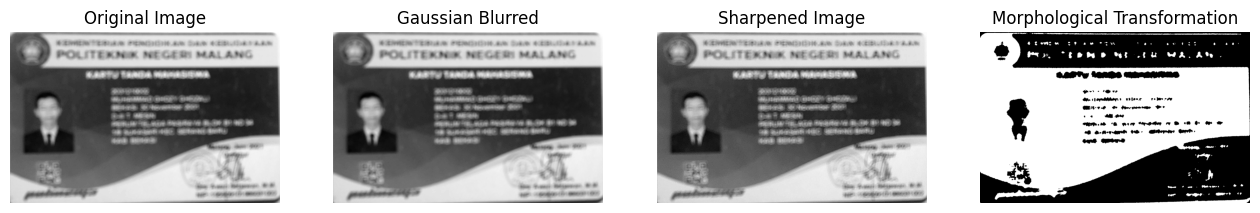

In [ ]:
# Load the blurred image
image_path = '/content/drive/MyDrive/PCVK/Images/KTM.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Sharpening the image to enhance edges
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

# Thresholding to make text more distinct
_, thresh = cv2.threshold(sharpened, 150, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to improve text clarity
# Apply dilation followed by erosion to make text bolder
kernel = np.ones((2,2), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

# Display the results
fig, axs = plt.subplots(1, 4, figsize=(16, 8))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(blurred, cmap='gray')
axs[1].set_title('Gaussian Blurred')
axs[1].axis('off')

axs[2].imshow(sharpened, cmap='gray')
axs[2].set_title('Sharpened Image')
axs[2].axis('off')

axs[3].imshow(morph, cmap='gray')
axs[3].set_title('Morphological Transformation')
axs[3].axis('off')

plt.show()


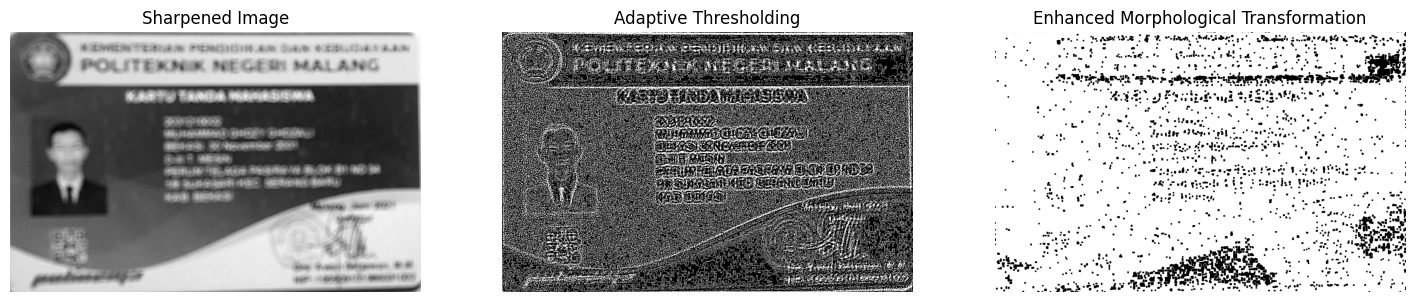

In [ ]:
# Adaptive Thresholding for better text isolation
adaptive_thresh = cv2.adaptiveThreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)

# Applying a stronger morphological transformation
kernel_strong = np.ones((3,3), np.uint8)
morph_strong = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel_strong, iterations=2)

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
axs[0].imshow(sharpened, cmap='gray')
axs[0].set_title('Sharpened Image')
axs[0].axis('off')

axs[1].imshow(adaptive_thresh, cmap='gray')
axs[1].set_title('Adaptive Thresholding')
axs[1].axis('off')

axs[2].imshow(morph_strong, cmap='gray')
axs[2].set_title('Enhanced Morphological Transformation')
axs[2].axis('off')

plt.show()


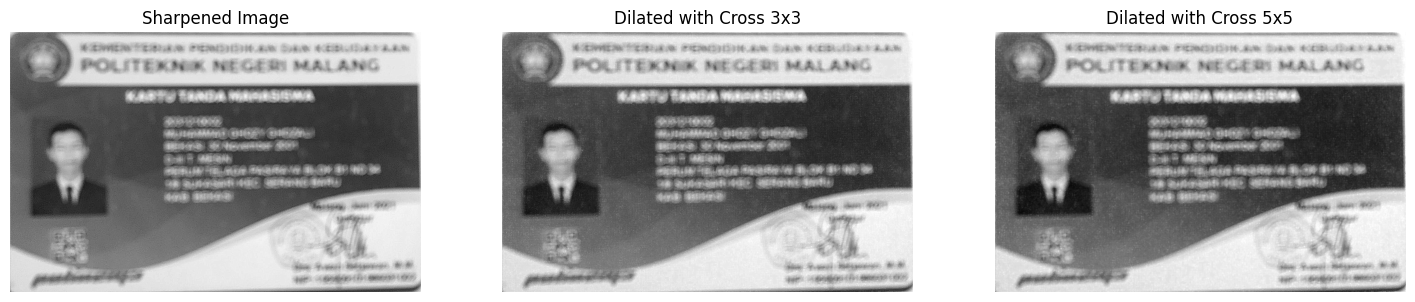

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
image_path = '/content/drive/MyDrive/PCVK/Images/KTM.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply sharpening filter (optional step for clarity before dilation)
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)

# Create cross-shaped structuring elements for dilation
cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Apply dilation using 3x3 cross-shaped structuring element
dilated_3x3 = cv2.dilate(sharpened, cross_3x3, iterations=1)

# Apply dilation using 5x5 cross-shaped structuring element
dilated_5x5 = cv2.dilate(sharpened, cross_5x5, iterations=1)

# Display results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(sharpened, cmap='gray')
axs[0].set_title('Sharpened Image')
axs[0].axis('off')

axs[1].imshow(dilated_3x3, cmap='gray')
axs[1].set_title('Dilated with Cross 3x3')
axs[1].axis('off')

axs[2].imshow(dilated_5x5, cmap='gray')
axs[2].set_title('Dilated with Cross 5x5')
axs[2].axis('off')

plt.show()
